In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ringdown.qnms
import qnm
import lal
from collections import namedtuple
import math

In [2]:
f,d = ringdown.qnms.get_ftau(80,.7,0,2,2)
print(f,d)

215.120586489489 0.004877153969849441


In [6]:
# ftauq_sub function

# x is user input of chi range
# ot is the range of overtones
# l and m are angular modes

x = np.arange(0,1,.01)
ot = np.arange(0,5,1)
T_MSUN = lal.MSUN_SI * lal.G_SI / lal.C_SI**3

def ftauq_sub(x,ot,l,m):
    fig,ax=plt.subplots(1,3, figsize=(18,5),sharex=False, sharey=False)
    for overtones in ot: # loop through various overtones to get 3 values (f*tau,tau/tau)
        ftau = []
        tau_tau = []
        q_factor = []
        for chi in x:
            f = ringdown.qnms.get_ftau(1,chi,overtones,l,m)
            f0 = f[0]*T_MSUN
            ftau.append(f0)
            t = ringdown.qnms.get_ftau(1,chi,overtones,l,m)
            t0 = t[1]/T_MSUN
            tau_tau.append(t0)
            q = ringdown.qnms.get_ftau(1,chi,overtones,l,m)
            q0 = q[0]*q[1]*math.pi
            q_factor.append(q0)
        ax[0].plot(x,ftau,label=f'n = ${{{overtones}}}$')
        ax[0].tick_params(labelsize=20)
        ax[1].plot(x,tau_tau,label=f'n = ${{{overtones}}}$')
        ax[1].tick_params(labelsize=20)
        ax[2].plot(x,q_factor,label=f'n = ${{{overtones}}}$')
        ax[2].tick_params(labelsize=20)
        fig.subplots_adjust(wspace=.3)
    temp_string = f'{l},{m}' 
    ax[0].set_ylabel(r'$f_{'+ temp_string+',n}$$t_M$',fontsize=25)
    ax[1].set_ylabel(r'$\tau_{'+ temp_string+',n}$/$t_M$',fontsize=25)
    ax[2].set_ylabel(r'$Q_{'+ temp_string+',n}$',fontsize=25)
    for ax in ax[0],ax[1],ax[2]:
        ax.set_xlabel('$\\chi$', fontsize=25)
        ax.legend(fontsize=15)

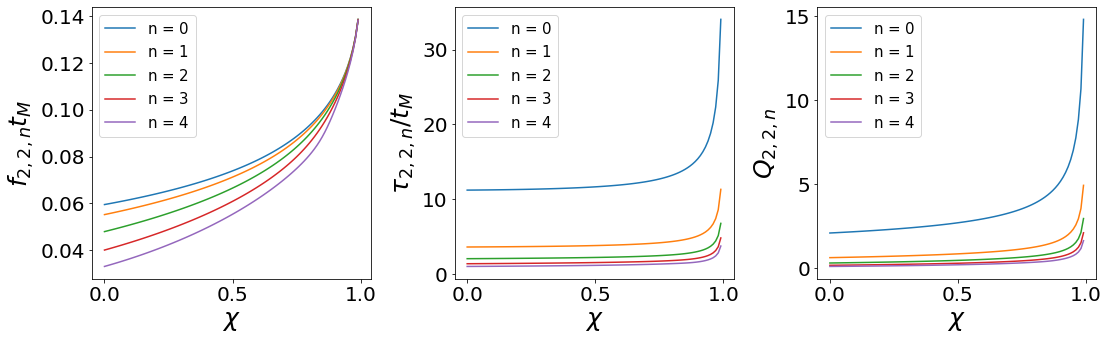

In [7]:
ftauq_sub(x,ot,2,2)
plt.savefig('isifarr_22_sbplt',bbox_inches='tight')

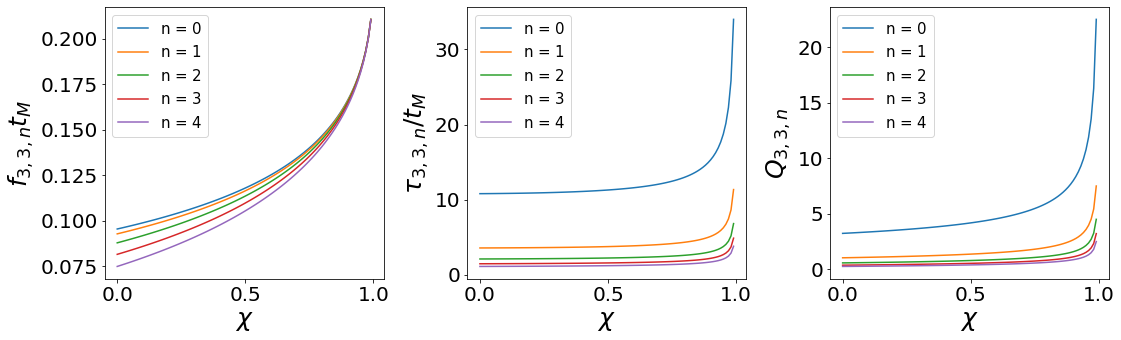

In [20]:
ftauq_sub(x,ot,3,3)
plt.savefig('isifarr_33_sbplt',bbox_inches='tight')

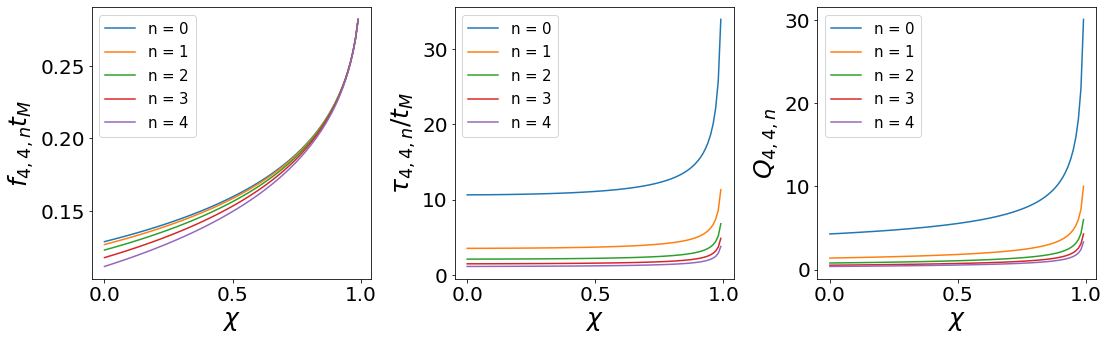

In [21]:
ftauq_sub(x,ot,4,4)
plt.savefig('isifarr_44_sbplt',bbox_inches='tight')

# l=2 m=2

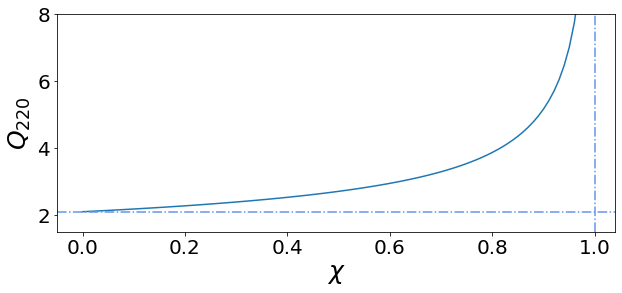

In [4]:
plt.figure(figsize=(10,4))
plt.plot(x,q0,label='n = 0')
a = 0.6
b = 3
plt.axhline(y=2.1, color='cornflowerblue', linestyle='dashdot')
plt.axvline(x=1.0, color='cornflowerblue', linestyle='dashdot')
plt.ylim([1.5,8])
plt.ylabel('$Q_{220}$',fontsize=25)
plt.xlabel('$\\chi$',fontsize=25)
plt.tick_params(labelsize=20)
plt.savefig('fig3_isifar_lm2',bbox_inches='tight')

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

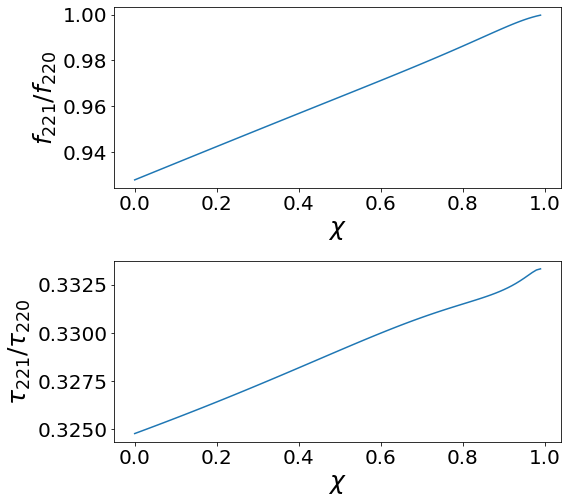

In [5]:
#f 221 / f 220 
plt.figure(figsize=(8,4))
x = np.arange(0,1,0.01)
f = []
for chi in x:
    z = ringdown.qnms.get_ftau(1,chi,1)
    z_new = ringdown.qnms.get_ftau(1,chi,0)
    z1 = z[0]
    z2 = z_new[0]
    f.append(z1/z2)

#tau 221 / tau 220 
plt.figure(figsize=(8,4))
x = np.arange(0,1,0.01)
f_tau = []
for chi in x:
    z_tau = ringdown.qnms.get_ftau(1,chi,1)
    z_new_tau = ringdown.qnms.get_ftau(1,chi,0)
    z1_tau = z_tau[1]
    z2_tau = z_new_tau[1]
    f_tau.append(z1_tau/z2_tau)

fig,ax=plt.subplots(2,1, figsize=(8,8),sharex=False, sharey=False)
ax[0].plot(x,f)
ax[1].plot(x,f_tau)
ax[1].set_xlabel('$\\chi$',fontsize=25)
ax[0].set_xlabel('$\\chi$',fontsize=25)
ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)
ax[0].set_ylabel('$f_{221}$/$f_{220}$',fontsize=25)
ax[1].set_ylabel('$\\tau_{221}$/$\\tau_{220}$',fontsize=25)

plt.subplots_adjust(hspace=0.4)
plt.savefig('fig4_isifar_lm2',bbox_inches='tight')

# l=3 m=3

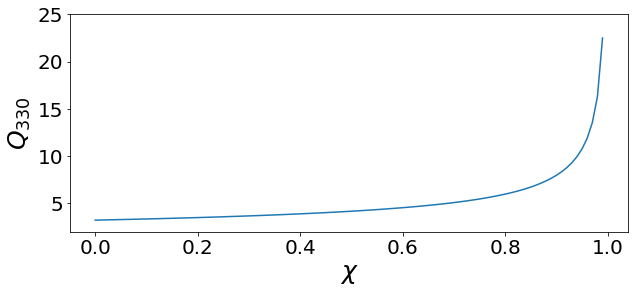

In [8]:
plt.figure(figsize=(10,4))
plt.plot(x,q0,label='n = 0')
a = 0.6
b = 3
#plt.axhline(y=2.1, color='cornflowerblue', linestyle='dashdot')
#plt.axvline(x=1.0, color='cornflowerblue', linestyle='dashdot')
plt.ylim([2,25])
plt.ylabel('$Q_{330}$',fontsize=25)
plt.xlabel('$\\chi$',fontsize=25)
plt.tick_params(labelsize=20)
plt.savefig('fig3_isifar_lm3',bbox_inches='tight')

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

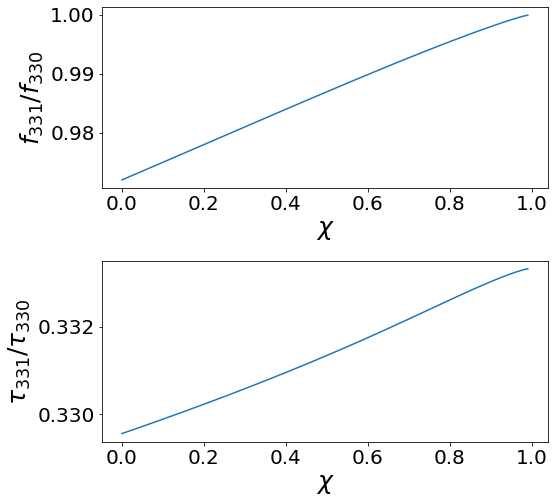

In [9]:
#f 331 / f 330 
plt.figure(figsize=(8,4))
x = np.arange(0,1,0.01)
f = []
for chi in x:
    z = ringdown.qnms.get_ftau(1,chi,1,l=3,m=3)
    z_new = ringdown.qnms.get_ftau(1,chi,0,l=3,m=3)
    z1 = z[0]
    z2 = z_new[0]
    f.append(z1/z2)

#tau 331 / tau 330 
plt.figure(figsize=(8,4))
x = np.arange(0,1,0.01)
f_tau = []
for chi in x:
    z_tau = ringdown.qnms.get_ftau(1,chi,1,l=3,m=3)
    z_new_tau = ringdown.qnms.get_ftau(1,chi,0,l=3,m=3)
    z1_tau = z_tau[1]
    z2_tau = z_new_tau[1]
    f_tau.append(z1_tau/z2_tau)

fig,ax=plt.subplots(2,1, figsize=(8,8),sharex=False, sharey=False)
ax[0].plot(x,f)
ax[1].plot(x,f_tau)
ax[1].set_xlabel('$\\chi$',fontsize=25)
ax[0].set_xlabel('$\\chi$',fontsize=25)
ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)
ax[0].set_ylabel('$f_{331}$/$f_{330}$',fontsize=25)
ax[1].set_ylabel('$\\tau_{331}$/$\\tau_{330}$',fontsize=25)

plt.subplots_adjust(hspace=0.4)
plt.savefig('fig4_isifar_lm3',bbox_inches='tight')

# l=4 m=4

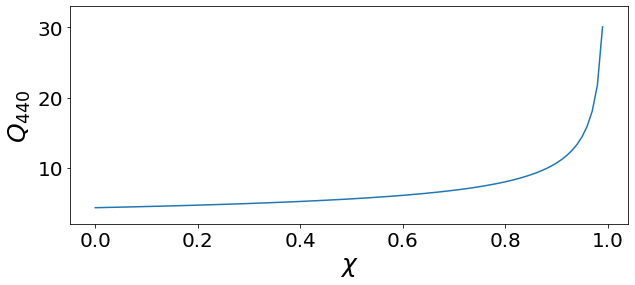

In [12]:
plt.figure(figsize=(10,4))
plt.plot(x,q0,label='n = 0')
a = 0.6
b = 3
#plt.axhline(y=2.1, color='cornflowerblue', linestyle='dashdot')
#plt.axvline(x=1.0, color='cornflowerblue', linestyle='dashdot')
plt.ylim([2,33])
plt.ylabel('$Q_{440}$',fontsize=25)
plt.xlabel('$\\chi$',fontsize=25)
plt.tick_params(labelsize=20)
plt.savefig('fig3_isifar_lm4',bbox_inches='tight')

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

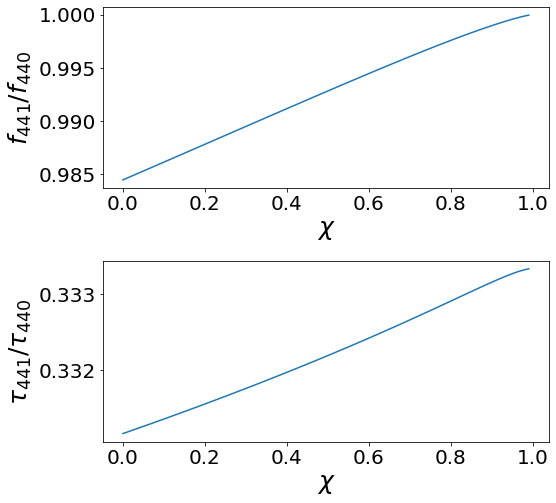

In [13]:
#f 441 / f 440 
plt.figure(figsize=(8,4))
x = np.arange(0,1,0.01)
f = []
for chi in x:
    z = ringdown.qnms.get_ftau(1,chi,1,l=4,m=4)
    z_new = ringdown.qnms.get_ftau(1,chi,0,l=4,m=4)
    z1 = z[0]
    z2 = z_new[0]
    f.append(z1/z2)

#tau 441 / tau 440 
plt.figure(figsize=(8,4))
x = np.arange(0,1,0.01)
f_tau = []
for chi in x:
    z_tau = ringdown.qnms.get_ftau(1,chi,1,l=4,m=4)
    z_new_tau = ringdown.qnms.get_ftau(1,chi,0,l=4,m=4)
    z1_tau = z_tau[1]
    z2_tau = z_new_tau[1]
    f_tau.append(z1_tau/z2_tau)

fig,ax=plt.subplots(2,1, figsize=(8,8),sharex=False, sharey=False)
ax[0].plot(x,f)
ax[1].plot(x,f_tau)
ax[1].set_xlabel('$\\chi$',fontsize=25)
ax[0].set_xlabel('$\\chi$',fontsize=25)
ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)
ax[0].set_ylabel('$f_{441}$/$f_{440}$',fontsize=25)
ax[1].set_ylabel('$\\tau_{441}$/$\\tau_{440}$',fontsize=25)

plt.subplots_adjust(hspace=0.4)
plt.savefig('fig4_isifar_lm4',bbox_inches='tight')

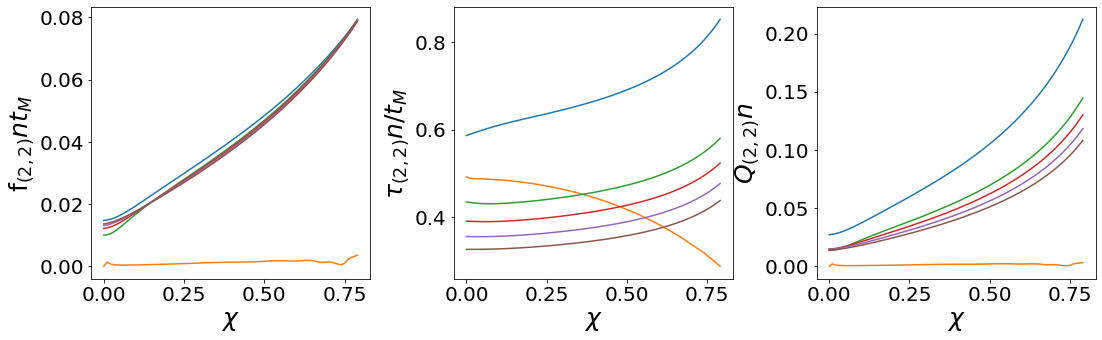

In [60]:
ot = np.arange(7,13,1)
x = np.arange(0,0.8,.01)
ftauq_sub(x,ot,2,2)